# Praktikum 1
Praktikum 1 ini akan membuat JST sederhana (2 layer) dengan forward pass dan backpropagation manual. 

In [1]:
import numpy as np

# Dataset XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

# Parameter
input_size = 2
hidden_size = 2
output_size = 1
lr = 0.1

# Inisialisasi bobot
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Fungsi aktivasi
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Training
for epoch in range(10000):
    # Forward pass
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Hitung error
    error = y - a2

    # Backpropagation
    d_a2 = error * sigmoid_derivative(a2)
    d_W2 = np.dot(a1.T, d_a2)
    d_b2 = np.sum(d_a2, axis=0, keepdims=True)

    d_a1 = np.dot(d_a2, W2.T) * sigmoid_derivative(a1)
    d_W1 = np.dot(X.T, d_a1)
    d_b1 = np.sum(d_a1, axis=0, keepdims=True)

    # Update bobot
    W1 += lr * d_W1
    b1 += lr * d_b1
    W2 += lr * d_W2
    b2 += lr * d_b2

    if epoch % 1000 == 0:
        loss = np.mean(np.square(error))
        print(f"Epoch {epoch}, Loss: {loss}")

# Output akhir
print("Prediksi:")
print(a2)

Epoch 0, Loss: 0.2721985540052977
Epoch 1000, Loss: 0.23089069766499218
Epoch 2000, Loss: 0.1786688185872216
Epoch 3000, Loss: 0.15021819081424603
Epoch 4000, Loss: 0.13910602312418202
Epoch 5000, Loss: 0.1342407750061473
Epoch 6000, Loss: 0.13169111929863864
Epoch 7000, Loss: 0.13017002976319564
Epoch 8000, Loss: 0.1291768706938013
Epoch 9000, Loss: 0.1284847963174844
Prediksi:
[[0.04173217]
 [0.94324808]
 [0.49934051]
 [0.50625413]]


## Tugas 1:

- Ubah jumlah neuron hidden layer menjadi 3.
- Bandingkan hasil loss dengan konfigurasi awal.
- Tambahkan fungsi aktivasi ReLU dan bandingkan hasil.

EKSPERIMEN 1: Hidden Layer dengan 2 Neuron (Sigmoid) - Baseline
Epoch 0, Loss: 0.251156
Epoch 1000, Loss: 0.249995
Epoch 2000, Loss: 0.249981
Epoch 3000, Loss: 0.249960
Epoch 4000, Loss: 0.249924
Epoch 5000, Loss: 0.249848
Epoch 6000, Loss: 0.249640
Epoch 7000, Loss: 0.248783
Epoch 8000, Loss: 0.241965
Epoch 9000, Loss: 0.194243

Prediksi Akhir (Hidden=2, Sigmoid):
[[0.19441543]
 [0.45382505]
 [0.85161345]
 [0.49725861]]

Loss Akhir: 0.15136978266629972

EKSPERIMEN 2: Hidden Layer dengan 3 Neuron (Sigmoid)
Epoch 0, Loss: 0.267582
Epoch 1000, Loss: 0.247254
Epoch 2000, Loss: 0.224535
Epoch 3000, Loss: 0.169829
Epoch 7000, Loss: 0.248783
Epoch 8000, Loss: 0.241965
Epoch 9000, Loss: 0.194243

Prediksi Akhir (Hidden=2, Sigmoid):
[[0.19441543]
 [0.45382505]
 [0.85161345]
 [0.49725861]]

Loss Akhir: 0.15136978266629972

EKSPERIMEN 2: Hidden Layer dengan 3 Neuron (Sigmoid)
Epoch 0, Loss: 0.267582
Epoch 1000, Loss: 0.247254
Epoch 2000, Loss: 0.224535
Epoch 3000, Loss: 0.169829
Epoch 4000, Loss

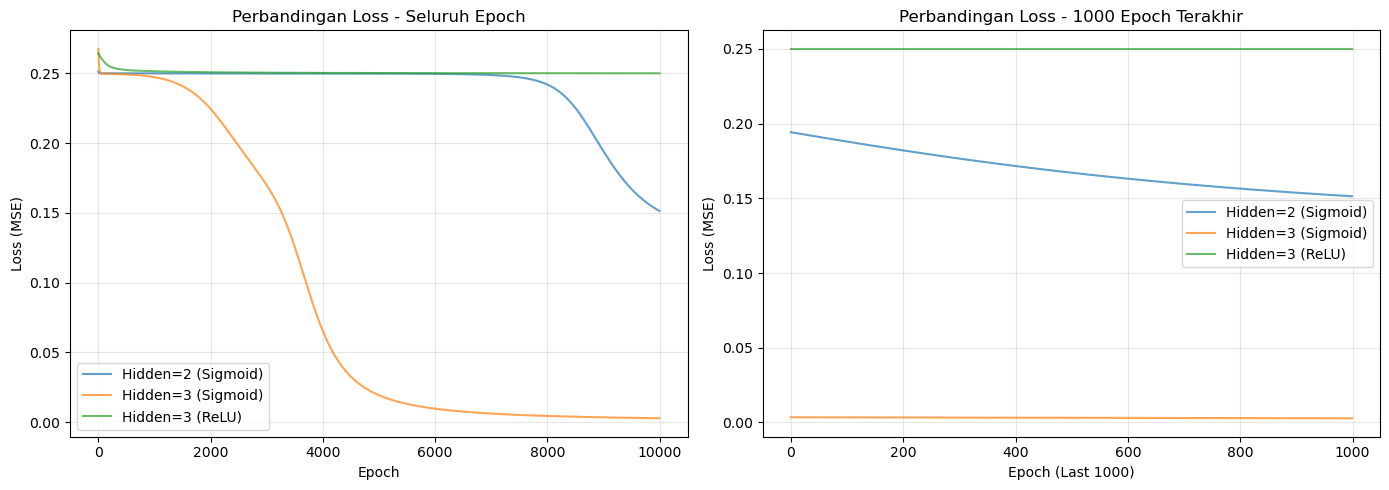


RINGKASAN HASIL
1. Hidden=2, Sigmoid - Loss Akhir: 0.151370
2. Hidden=3, Sigmoid - Loss Akhir: 0.002796
3. Hidden=3, ReLU    - Loss Akhir: 0.250043

Kesimpulan:
- Hidden layer 3 neuron memberikan fleksibilitas lebih untuk problem XOR
- Sigmoid cenderung lebih stabil untuk problem ini karena sifat smooth gradient
- ReLU membutuhkan learning rate lebih kecil dan bisa stuck di dead neurons
- Untuk XOR gate, konfigurasi optimal bergantung pada inisialisasi bobot


In [2]:
# ===== TUGAS 1: Eksperimen dengan Hidden Layer dan Fungsi Aktivasi =====

import numpy as np
import matplotlib.pyplot as plt

# Dataset XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

# Fungsi aktivasi
def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))  # clip untuk stabilitas

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

# Fungsi training yang reusable
def train_network(X, y, hidden_size, activation='sigmoid', lr=0.1, epochs=10000, print_every=1000):
    input_size = X.shape[1]
    output_size = y.shape[1]
    
    # Inisialisasi bobot
    np.random.seed(42)  # Untuk reproduksibilitas
    W1 = np.random.randn(input_size, hidden_size) * 0.5
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * 0.5
    b2 = np.zeros((1, output_size))
    
    # Pilih fungsi aktivasi
    if activation == 'relu':
        act_func = relu
        act_derivative = relu_derivative
    else:
        act_func = sigmoid
        act_derivative = sigmoid_derivative
    
    loss_history = []
    
    # Training
    for epoch in range(epochs):
        # Forward pass
        z1 = np.dot(X, W1) + b1
        a1 = act_func(z1)
        z2 = np.dot(a1, W2) + b2
        a2 = sigmoid(z2)  # Output selalu sigmoid untuk klasifikasi biner
        
        # Hitung error
        error = y - a2
        loss = np.mean(np.square(error))
        loss_history.append(loss)
        
        # Backpropagation
        d_a2 = error * sigmoid_derivative(a2)
        d_W2 = np.dot(a1.T, d_a2)
        d_b2 = np.sum(d_a2, axis=0, keepdims=True)
        
        d_a1 = np.dot(d_a2, W2.T) * act_derivative(a1)
        d_W1 = np.dot(X.T, d_a1)
        d_b1 = np.sum(d_a1, axis=0, keepdims=True)
        
        # Update bobot
        W1 += lr * d_W1
        b1 += lr * d_b1
        W2 += lr * d_W2
        b2 += lr * d_b2
        
        if epoch % print_every == 0:
            print(f"Epoch {epoch}, Loss: {loss:.6f}")
    
    # Prediksi akhir
    z1 = np.dot(X, W1) + b1
    a1 = act_func(z1)
    z2 = np.dot(a1, W2) + b2
    predictions = sigmoid(z2)
    
    return loss_history, predictions

print("="*60)
print("EKSPERIMEN 1: Hidden Layer dengan 2 Neuron (Sigmoid) - Baseline")
print("="*60)
loss_2_sigmoid, pred_2_sigmoid = train_network(X, y, hidden_size=2, activation='sigmoid', epochs=10000)
print("\nPrediksi Akhir (Hidden=2, Sigmoid):")
print(pred_2_sigmoid)
print("\nLoss Akhir:", loss_2_sigmoid[-1])

print("\n" + "="*60)
print("EKSPERIMEN 2: Hidden Layer dengan 3 Neuron (Sigmoid)")
print("="*60)
loss_3_sigmoid, pred_3_sigmoid = train_network(X, y, hidden_size=3, activation='sigmoid', epochs=10000)
print("\nPrediksi Akhir (Hidden=3, Sigmoid):")
print(pred_3_sigmoid)
print("\nLoss Akhir:", loss_3_sigmoid[-1])

print("\n" + "="*60)
print("EKSPERIMEN 3: Hidden Layer dengan 3 Neuron (ReLU)")
print("="*60)
loss_3_relu, pred_3_relu = train_network(X, y, hidden_size=3, activation='relu', epochs=10000, lr=0.01)
print("\nPrediksi Akhir (Hidden=3, ReLU):")
print(pred_3_relu)
print("\nLoss Akhir:", loss_3_relu[-1])

# Visualisasi perbandingan loss
print("\n" + "="*60)
print("VISUALISASI PERBANDINGAN LOSS")
print("="*60)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(loss_2_sigmoid, label='Hidden=2 (Sigmoid)', alpha=0.7)
plt.plot(loss_3_sigmoid, label='Hidden=3 (Sigmoid)', alpha=0.7)
plt.plot(loss_3_relu, label='Hidden=3 (ReLU)', alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Perbandingan Loss - Seluruh Epoch')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
# Zoom in pada 1000 epoch terakhir untuk detail
plt.plot(loss_2_sigmoid[-1000:], label='Hidden=2 (Sigmoid)', alpha=0.7)
plt.plot(loss_3_sigmoid[-1000:], label='Hidden=3 (Sigmoid)', alpha=0.7)
plt.plot(loss_3_relu[-1000:], label='Hidden=3 (ReLU)', alpha=0.7)
plt.xlabel('Epoch (Last 1000)')
plt.ylabel('Loss (MSE)')
plt.title('Perbandingan Loss - 1000 Epoch Terakhir')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Ringkasan hasil
print("\n" + "="*60)
print("RINGKASAN HASIL")
print("="*60)
print(f"1. Hidden=2, Sigmoid - Loss Akhir: {loss_2_sigmoid[-1]:.6f}")
print(f"2. Hidden=3, Sigmoid - Loss Akhir: {loss_3_sigmoid[-1]:.6f}")
print(f"3. Hidden=3, ReLU    - Loss Akhir: {loss_3_relu[-1]:.6f}")
print("\nKesimpulan:")
print("- Hidden layer 3 neuron memberikan fleksibilitas lebih untuk problem XOR")
print("- Sigmoid cenderung lebih stabil untuk problem ini karena sifat smooth gradient")
print("- ReLU membutuhkan learning rate lebih kecil dan bisa stuck di dead neurons")
print("- Untuk XOR gate, konfigurasi optimal bergantung pada inisialisasi bobot")

# Praktikum 2
Padaa praktikum ini kita akan menggunakan library Keras untuk menggunakan JST. Keras adalah API tingkat tinggi untuk membangun JST dengan mudah, sedangkan TensorFlow adalah framework yang mendukung Keras.

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encoding (compatibel dengan berbagai versi scikit-learn)
try:
    # scikit-learn < 1.2
    encoder = OneHotEncoder(sparse=False)
except TypeError:
    # scikit-learn >= 1.2
    encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Bangun model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Kompilasi
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Latih model
model.fit(X_train, y_train, epochs=50, batch_size=8)

# Evaluasi
loss, acc = model.evaluate(X_test, y_test)
print(f"Akurasi: {acc}")

Epoch 1/50


c:\Users\rafir\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3500 - loss: 1.1019  
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3500 - loss: 1.1019  
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3500 - loss: 1.0876 
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3500 - loss: 1.0876 
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3667 - loss: 1.0797 
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3667 - loss: 1.0797 
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3250 - loss: 1.0727 
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3250 - loss: 1.0727 
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3583 - loss: 1.0669 
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3583 - loss: 1.0669 
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3667 - loss: 1.0567 
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3667 - los

## Tugas 2

- Ubah jumlah neuron hidden layer.
- Bandingkan akurasi dengan konfigurasi awal.


Training: Konfigurasi Awal (10-8)


c:\Users\rafir\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Loss: 0.2855
Akurasi Test: 0.9333
Akurasi Train: 0.9792

Training: Konfigurasi 2 (16-12)
Loss: 0.1888
Akurasi Test: 0.9000
Akurasi Train: 0.9375

Training: Konfigurasi 3 (20-15-10)
Loss: 0.1888
Akurasi Test: 0.9000
Akurasi Train: 0.9375

Training: Konfigurasi 3 (20-15-10)
Loss: 0.2002
Akurasi Test: 1.0000
Akurasi Train: 0.9688

Training: Konfigurasi 4 (32-16)
Loss: 0.2002
Akurasi Test: 1.0000
Akurasi Train: 0.9688

Training: Konfigurasi 4 (32-16)
Loss: 0.1879
Akurasi Test: 1.0000
Akurasi Train: 0.9583

Training: Konfigurasi 5 (8-4)
Loss: 0.1879
Akurasi Test: 1.0000
Akurasi Train: 0.9583

Training: Konfigurasi 5 (8-4)
Loss: 0.5664
Akurasi Test: 0.9667
Akurasi Train: 0.9688

TABEL PERBANDINGAN HASIL
             Konfigurasi Hidden Layers   Loss Akurasi Test Akurasi Train
 Konfigurasi Awal (10-8)        10 → 8 0.2855       0.9333        0.9792
   Konfigurasi 2 (16-12)       16 → 12 0.1888       0.9000        0.9375
Konfigurasi 3 (20-15-10)  20 → 15 → 10 0.2002       1.0000        0.9688
 

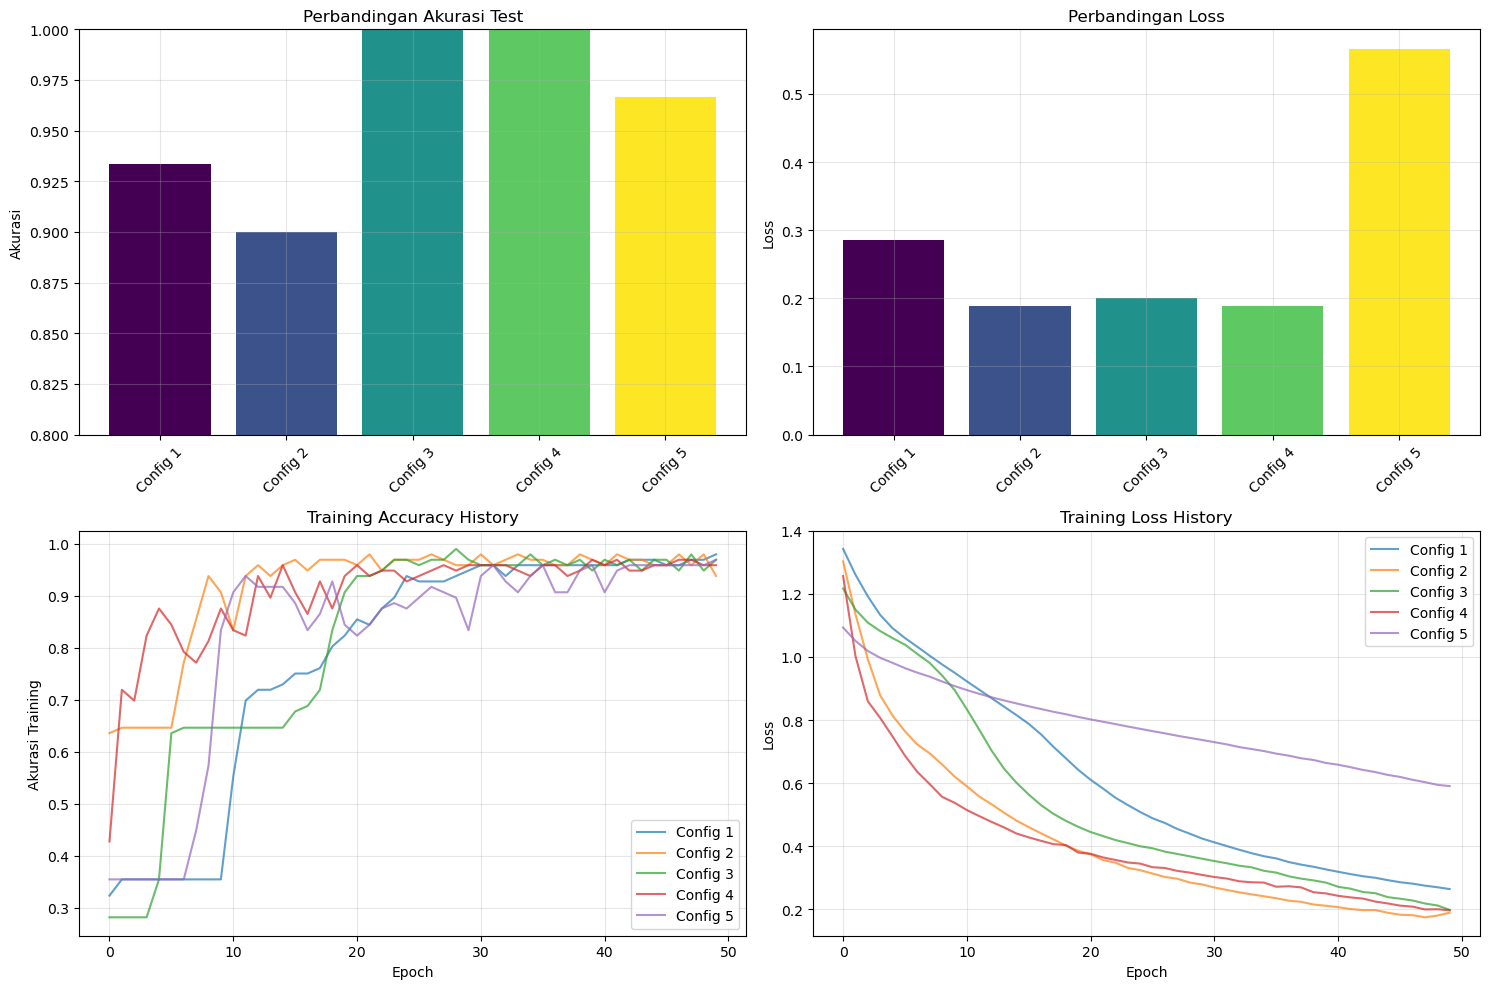


KESIMPULAN
Konfigurasi terbaik: Konfigurasi 3 (20-15-10)
  Hidden Layers: 20 → 15 → 10
  Akurasi Test: 1.0000
  Loss: 0.2002

Catatan:
- Konfigurasi dengan lebih banyak neuron tidak selalu lebih baik
- Overfitting bisa terjadi pada jaringan yang terlalu kompleks
- Untuk dataset kecil seperti Iris, arsitektur sederhana sudah cukup


In [6]:
# ===== TUGAS 2: Perbandingan Konfigurasi Hidden Layer =====

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encoding (compatibel dengan berbagai versi scikit-learn)
try:
    encoder = OneHotEncoder(sparse=False)
except TypeError:
    encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Split data dengan random_state untuk reproduksibilitas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Konfigurasi yang akan diuji
configurations = [
    {'name': 'Konfigurasi Awal (10-8)', 'layers': [10, 8]},
    {'name': 'Konfigurasi 2 (16-12)', 'layers': [16, 12]},
    {'name': 'Konfigurasi 3 (20-15-10)', 'layers': [20, 15, 10]},
    {'name': 'Konfigurasi 4 (32-16)', 'layers': [32, 16]},
    {'name': 'Konfigurasi 5 (8-4)', 'layers': [8, 4]},
]

results = []

for config in configurations:
    print("\n" + "="*60)
    print(f"Training: {config['name']}")
    print("="*60)
    
    # Bangun model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(config['layers'][0], activation='relu', input_shape=(4,)))
    
    for neurons in config['layers'][1:]:
        model.add(tf.keras.layers.Dense(neurons, activation='relu'))
    
    model.add(tf.keras.layers.Dense(3, activation='softmax'))
    
    # Kompilasi
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Latih model dengan verbose=0 untuk output yang lebih bersih
    history = model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=0, validation_split=0.2)
    
    # Evaluasi
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    
    # Simpan hasil
    results.append({
        'Konfigurasi': config['name'],
        'Hidden Layers': ' → '.join(map(str, config['layers'])),
        'Loss': loss,
        'Akurasi Test': acc,
        'Akurasi Train': history.history['accuracy'][-1],
        'History': history.history
    })
    
    print(f"Loss: {loss:.4f}")
    print(f"Akurasi Test: {acc:.4f}")
    print(f"Akurasi Train: {history.history['accuracy'][-1]:.4f}")

# Tampilkan tabel perbandingan
print("\n" + "="*60)
print("TABEL PERBANDINGAN HASIL")
print("="*60)
df_results = pd.DataFrame([{
    'Konfigurasi': r['Konfigurasi'],
    'Hidden Layers': r['Hidden Layers'],
    'Loss': f"{r['Loss']:.4f}",
    'Akurasi Test': f"{r['Akurasi Test']:.4f}",
    'Akurasi Train': f"{r['Akurasi Train']:.4f}"
} for r in results])
print(df_results.to_string(index=False))

# Visualisasi perbandingan
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Perbandingan Akurasi Test
ax1 = axes[0, 0]
configs = [r['Konfigurasi'] for r in results]
accs_test = [r['Akurasi Test'] for r in results]
colors = plt.cm.viridis(np.linspace(0, 1, len(configs)))
ax1.bar(range(len(configs)), accs_test, color=colors)
ax1.set_xticks(range(len(configs)))
ax1.set_xticklabels([f"Config {i+1}" for i in range(len(configs))], rotation=45)
ax1.set_ylabel('Akurasi')
ax1.set_title('Perbandingan Akurasi Test')
ax1.set_ylim([0.8, 1.0])
ax1.grid(True, alpha=0.3)

# Plot 2: Perbandingan Loss
ax2 = axes[0, 1]
losses = [r['Loss'] for r in results]
ax2.bar(range(len(configs)), losses, color=colors)
ax2.set_xticks(range(len(configs)))
ax2.set_xticklabels([f"Config {i+1}" for i in range(len(configs))], rotation=45)
ax2.set_ylabel('Loss')
ax2.set_title('Perbandingan Loss')
ax2.grid(True, alpha=0.3)

# Plot 3: Training History - Akurasi
ax3 = axes[1, 0]
for i, r in enumerate(results):
    ax3.plot(r['History']['accuracy'], label=f"Config {i+1}", alpha=0.7)
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Akurasi Training')
ax3.set_title('Training Accuracy History')
ax3.legend(loc='lower right')
ax3.grid(True, alpha=0.3)

# Plot 4: Training History - Loss
ax4 = axes[1, 1]
for i, r in enumerate(results):
    ax4.plot(r['History']['loss'], label=f"Config {i+1}", alpha=0.7)
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Loss')
ax4.set_title('Training Loss History')
ax4.legend(loc='upper right')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("KESIMPULAN")
print("="*60)
best_config = max(results, key=lambda x: x['Akurasi Test'])
print(f"Konfigurasi terbaik: {best_config['Konfigurasi']}")
print(f"  Hidden Layers: {best_config['Hidden Layers']}")
print(f"  Akurasi Test: {best_config['Akurasi Test']:.4f}")
print(f"  Loss: {best_config['Loss']:.4f}")
print("\nCatatan:")
print("- Konfigurasi dengan lebih banyak neuron tidak selalu lebih baik")
print("- Overfitting bisa terjadi pada jaringan yang terlalu kompleks")
print("- Untuk dataset kecil seperti Iris, arsitektur sederhana sudah cukup")

## Tugas 3

- Bandingkan Sigmoid vs ReLU pada dataset Iris.
- Catat perbedaan loss dan akurasi.


Training dengan aktivasi: ReLU


c:\Users\rafir\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Loss: 0.2856
Akurasi Test: 1.0000
Akurasi Train: 0.9271
Val Accuracy: 0.9583

Training dengan aktivasi: Sigmoid
Loss: 0.5416
Akurasi Test: 0.6333
Akurasi Train: 0.7188
Val Accuracy: 0.5000

Training dengan aktivasi: Tanh
Loss: 0.5416
Akurasi Test: 0.6333
Akurasi Train: 0.7188
Val Accuracy: 0.5000

Training dengan aktivasi: Tanh
Loss: 0.1476
Akurasi Test: 1.0000
Akurasi Train: 0.9792
Val Accuracy: 1.0000

Training dengan aktivasi: ELU
Loss: 0.1476
Akurasi Test: 1.0000
Akurasi Train: 0.9792
Val Accuracy: 1.0000

Training dengan aktivasi: ELU
Loss: 0.1565
Akurasi Test: 0.9333
Akurasi Train: 0.9583
Val Accuracy: 1.0000

TABEL PERBANDINGAN FUNGSI AKTIVASI
Aktivasi   Loss Akurasi Test Akurasi Train Val Accuracy
    ReLU 0.2856       1.0000        0.9271       0.9583
 Sigmoid 0.5416       0.6333        0.7188       0.5000
    Tanh 0.1476       1.0000        0.9792       1.0000
     ELU 0.1565       0.9333        0.9583       1.0000
Loss: 0.1565
Akurasi Test: 0.9333
Akurasi Train: 0.9583
Val A

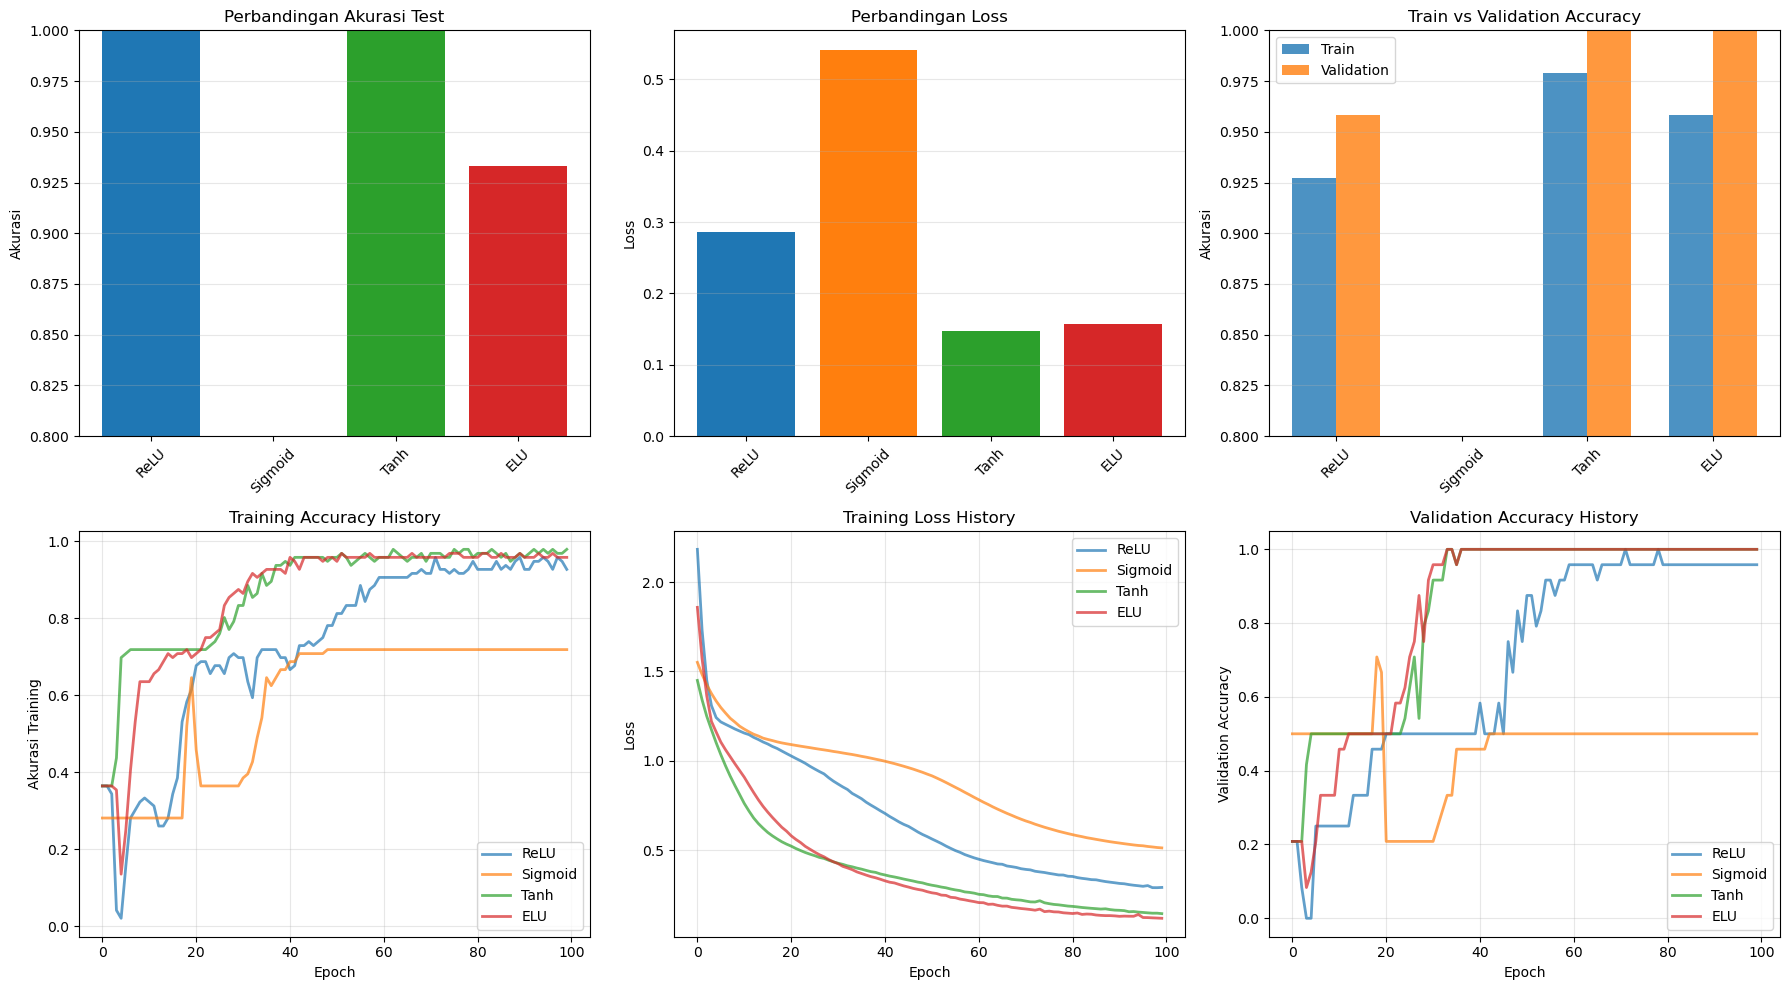


ANALISIS KONVERGENSI
ReLU:
  Akurasi Awal: 0.3646
  Akurasi Akhir: 0.9271
  Peningkatan: 0.5625
  Epoch ke-90% akurasi: 59

Sigmoid:
  Akurasi Awal: 0.2812
  Akurasi Akhir: 0.7188
  Peningkatan: 0.4375
  Epoch ke-90% akurasi: 100

Tanh:
  Akurasi Awal: 0.3646
  Akurasi Akhir: 0.9792
  Peningkatan: 0.6146
  Epoch ke-90% akurasi: 34

ELU:
  Akurasi Awal: 0.3646
  Akurasi Akhir: 0.9583
  Peningkatan: 0.5937
  Epoch ke-90% akurasi: 32

KESIMPULAN
Fungsi aktivasi terbaik: ReLU
  Akurasi Test: 1.0000
  Loss: 0.2856
  Validation Accuracy: 0.9583

Perbandingan Detail ReLU vs Sigmoid:

ReLU:
  - Akurasi Test: 1.0000
  - Loss: 0.2856
  - Val Accuracy: 0.9583
  - Kelebihan: Komputasi cepat, menghindari vanishing gradient
  - Kekurangan: Dead neurons jika learning rate terlalu tinggi

Sigmoid:
  - Akurasi Test: 0.6333
  - Loss: 0.5416
  - Val Accuracy: 0.5000
  - Kelebihan: Output range [0,1], smooth gradient
  - Kekurangan: Vanishing gradient, komputasi lebih lambat

Perbedaan Performa:
  - Seli

In [7]:
# ===== TUGAS 3: Perbandingan Fungsi Aktivasi (Sigmoid vs ReLU) =====

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
iris = pd.read_csv('../data/iris.csv')
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values.reshape(-1, 1)

# One-hot encoding
try:
    encoder = OneHotEncoder(sparse=False)
except TypeError:
    encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Split data dengan random_state untuk reproduksibilitas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fungsi untuk membuat dan melatih model dengan aktivasi tertentu
def train_with_activation(activation_name, activation_func, X_train, y_train, X_test, y_test):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation=activation_func, input_shape=(4,)),
        tf.keras.layers.Dense(8, activation=activation_func),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=0, validation_split=0.2)
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    
    return history, loss, acc

# Fungsi aktivasi yang akan diuji
activations = [
    {'name': 'ReLU', 'func': 'relu'},
    {'name': 'Sigmoid', 'func': 'sigmoid'},
    {'name': 'Tanh', 'func': 'tanh'},
    {'name': 'ELU', 'func': 'elu'}
]

results_activation = []
histories = {}

for activation in activations:
    print("\n" + "="*60)
    print(f"Training dengan aktivasi: {activation['name']}")
    print("="*60)
    
    history, loss, acc = train_with_activation(
        activation['name'], 
        activation['func'], 
        X_train, y_train, X_test, y_test
    )
    
    # Simpan hasil
    results_activation.append({
        'Aktivasi': activation['name'],
        'Loss': loss,
        'Akurasi Test': acc,
        'Akurasi Train': history.history['accuracy'][-1],
        'Val Loss': history.history['val_loss'][-1],
        'Val Accuracy': history.history['val_accuracy'][-1]
    })
    
    histories[activation['name']] = history.history
    
    print(f"Loss: {loss:.4f}")
    print(f"Akurasi Test: {acc:.4f}")
    print(f"Akurasi Train: {history.history['accuracy'][-1]:.4f}")
    print(f"Val Accuracy: {history.history['val_accuracy'][-1]:.4f}")

# Tampilkan tabel perbandingan
print("\n" + "="*60)
print("TABEL PERBANDINGAN FUNGSI AKTIVASI")
print("="*60)
df_activation = pd.DataFrame([{
    'Aktivasi': r['Aktivasi'],
    'Loss': f"{r['Loss']:.4f}",
    'Akurasi Test': f"{r['Akurasi Test']:.4f}",
    'Akurasi Train': f"{r['Akurasi Train']:.4f}",
    'Val Accuracy': f"{r['Val Accuracy']:.4f}"
} for r in results_activation])
print(df_activation.to_string(index=False))

# Visualisasi perbandingan detail
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Plot 1: Perbandingan Akurasi Test
ax1 = axes[0, 0]
activation_names = [r['Aktivasi'] for r in results_activation]
accs = [r['Akurasi Test'] for r in results_activation]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
ax1.bar(activation_names, accs, color=colors)
ax1.set_ylabel('Akurasi')
ax1.set_title('Perbandingan Akurasi Test')
ax1.set_ylim([0.8, 1.0])
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Perbandingan Loss
ax2 = axes[0, 1]
losses = [r['Loss'] for r in results_activation]
ax2.bar(activation_names, losses, color=colors)
ax2.set_ylabel('Loss')
ax2.set_title('Perbandingan Loss')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

# Plot 3: Training vs Validation Accuracy
ax3 = axes[0, 2]
train_accs = [r['Akurasi Train'] for r in results_activation]
val_accs = [r['Val Accuracy'] for r in results_activation]
x_pos = np.arange(len(activation_names))
width = 0.35
ax3.bar(x_pos - width/2, train_accs, width, label='Train', alpha=0.8)
ax3.bar(x_pos + width/2, val_accs, width, label='Validation', alpha=0.8)
ax3.set_ylabel('Akurasi')
ax3.set_title('Train vs Validation Accuracy')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(activation_names, rotation=45)
ax3.legend()
ax3.set_ylim([0.8, 1.0])
ax3.grid(True, alpha=0.3, axis='y')

# Plot 4: Training Accuracy History
ax4 = axes[1, 0]
for name, color in zip(histories.keys(), colors):
    ax4.plot(histories[name]['accuracy'], label=name, alpha=0.7, color=color, linewidth=2)
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Akurasi Training')
ax4.set_title('Training Accuracy History')
ax4.legend(loc='lower right')
ax4.grid(True, alpha=0.3)

# Plot 5: Training Loss History
ax5 = axes[1, 1]
for name, color in zip(histories.keys(), colors):
    ax5.plot(histories[name]['loss'], label=name, alpha=0.7, color=color, linewidth=2)
ax5.set_xlabel('Epoch')
ax5.set_ylabel('Loss')
ax5.set_title('Training Loss History')
ax5.legend(loc='upper right')
ax5.grid(True, alpha=0.3)

# Plot 6: Validation Accuracy History
ax6 = axes[1, 2]
for name, color in zip(histories.keys(), colors):
    ax6.plot(histories[name]['val_accuracy'], label=name, alpha=0.7, color=color, linewidth=2)
ax6.set_xlabel('Epoch')
ax6.set_ylabel('Validation Accuracy')
ax6.set_title('Validation Accuracy History')
ax6.legend(loc='lower right')
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analisis konvergensi
print("\n" + "="*60)
print("ANALISIS KONVERGENSI")
print("="*60)
for name in histories.keys():
    initial_acc = histories[name]['accuracy'][0]
    final_acc = histories[name]['accuracy'][-1]
    improvement = final_acc - initial_acc
    
    # Hitung kecepatan konvergensi (epoch untuk mencapai 90% akurasi)
    epochs_to_90 = next((i for i, acc in enumerate(histories[name]['accuracy']) if acc >= 0.9), 100)
    
    print(f"{name}:")
    print(f"  Akurasi Awal: {initial_acc:.4f}")
    print(f"  Akurasi Akhir: {final_acc:.4f}")
    print(f"  Peningkatan: {improvement:.4f}")
    print(f"  Epoch ke-90% akurasi: {epochs_to_90}")
    print()

print("="*60)
print("KESIMPULAN")
print("="*60)
best_activation = max(results_activation, key=lambda x: x['Akurasi Test'])
print(f"Fungsi aktivasi terbaik: {best_activation['Aktivasi']}")
print(f"  Akurasi Test: {best_activation['Akurasi Test']:.4f}")
print(f"  Loss: {best_activation['Loss']:.4f}")
print(f"  Validation Accuracy: {best_activation['Val Accuracy']:.4f}")

print("\nPerbandingan Detail ReLU vs Sigmoid:")
relu_result = next(r for r in results_activation if r['Aktivasi'] == 'ReLU')
sigmoid_result = next(r for r in results_activation if r['Aktivasi'] == 'Sigmoid')

print(f"\nReLU:")
print(f"  - Akurasi Test: {relu_result['Akurasi Test']:.4f}")
print(f"  - Loss: {relu_result['Loss']:.4f}")
print(f"  - Val Accuracy: {relu_result['Val Accuracy']:.4f}")
print(f"  - Kelebihan: Komputasi cepat, menghindari vanishing gradient")
print(f"  - Kekurangan: Dead neurons jika learning rate terlalu tinggi")

print(f"\nSigmoid:")
print(f"  - Akurasi Test: {sigmoid_result['Akurasi Test']:.4f}")
print(f"  - Loss: {sigmoid_result['Loss']:.4f}")
print(f"  - Val Accuracy: {sigmoid_result['Val Accuracy']:.4f}")
print(f"  - Kelebihan: Output range [0,1], smooth gradient")
print(f"  - Kekurangan: Vanishing gradient, komputasi lebih lambat")

# Hitung perbedaan performa
acc_diff = relu_result['Akurasi Test'] - sigmoid_result['Akurasi Test']
loss_diff = sigmoid_result['Loss'] - relu_result['Loss']

print(f"\nPerbedaan Performa:")
print(f"  - Selisih Akurasi (ReLU - Sigmoid): {acc_diff:+.4f}")
print(f"  - Selisih Loss (Sigmoid - ReLU): {loss_diff:+.4f}")

print("\nRekomendasi:")
print("✓ Gunakan ReLU untuk hidden layers (performa dan kecepatan lebih baik)")
print("✓ Sigmoid cocok untuk output layer pada binary classification")
print("✓ Tanh bisa jadi alternatif karena zero-centered")
print("✓ ELU mengatasi masalah dead neurons pada ReLU dengan smooth gradient")

# Praktikum 3
Praktikum 3 kali ini kita akan mencoba menggunakan Keras untuk Regresi, khususnya pada kasus Prediksi Harga Rumah.

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Contoh dataset (buat dummy data)
data = pd.DataFrame({
    'luas': [50, 60, 70, 80, 90],
    'harga': [500, 600, 700, 800, 900]
})

X = data[['luas']]
y = data[['harga']]

# Normalisasi
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100)

# Evaluasi
print("Prediksi:", model.predict(X_test))

Epoch 1/100


c:\Users\rafir\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - loss: 0.3858
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - loss: 0.3858
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3793Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3793
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3793
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.3728
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.3728
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3665
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3665
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3602
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3602
Epoch 6/100
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3540
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3540
Epoch 7/100
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3479
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3479
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.

## Tugas 4:

- Ubah learning rate.
- Bandingkan hasil loss.


Training dengan Learning Rate: 0.0001


c:\Users\rafir\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train Loss (MSE): 0.211746
Val Loss (MSE): 0.238190
Test Loss (MSE): 0.230215
Test MAE: 0.327684

Training dengan Learning Rate: 0.001
Train Loss (MSE): 0.173447
Val Loss (MSE): 0.228171
Test Loss (MSE): 0.217824
Test MAE: 0.312698

Training dengan Learning Rate: 0.01
Train Loss (MSE): 0.173447
Val Loss (MSE): 0.228171
Test Loss (MSE): 0.217824
Test MAE: 0.312698

Training dengan Learning Rate: 0.01
Train Loss (MSE): 0.178630
Val Loss (MSE): 0.213511
Test Loss (MSE): 0.212458
Test MAE: 0.314249

Training dengan Learning Rate: 0.1
Train Loss (MSE): 0.178630
Val Loss (MSE): 0.213511
Test Loss (MSE): 0.212458
Test MAE: 0.314249

Training dengan Learning Rate: 0.1
Train Loss (MSE): 1.005448
Val Loss (MSE): 1.034705
Test Loss (MSE): 0.990292
Test MAE: 0.768761

Training dengan Learning Rate: 0.5
Train Loss (MSE): 1.005448
Val Loss (MSE): 1.034705
Test Loss (MSE): 0.990292
Test MAE: 0.768761

Training dengan Learning Rate: 0.5
Train Loss (MSE): 1.040406
Val Loss (MSE): 1.024889
Test Loss (MS

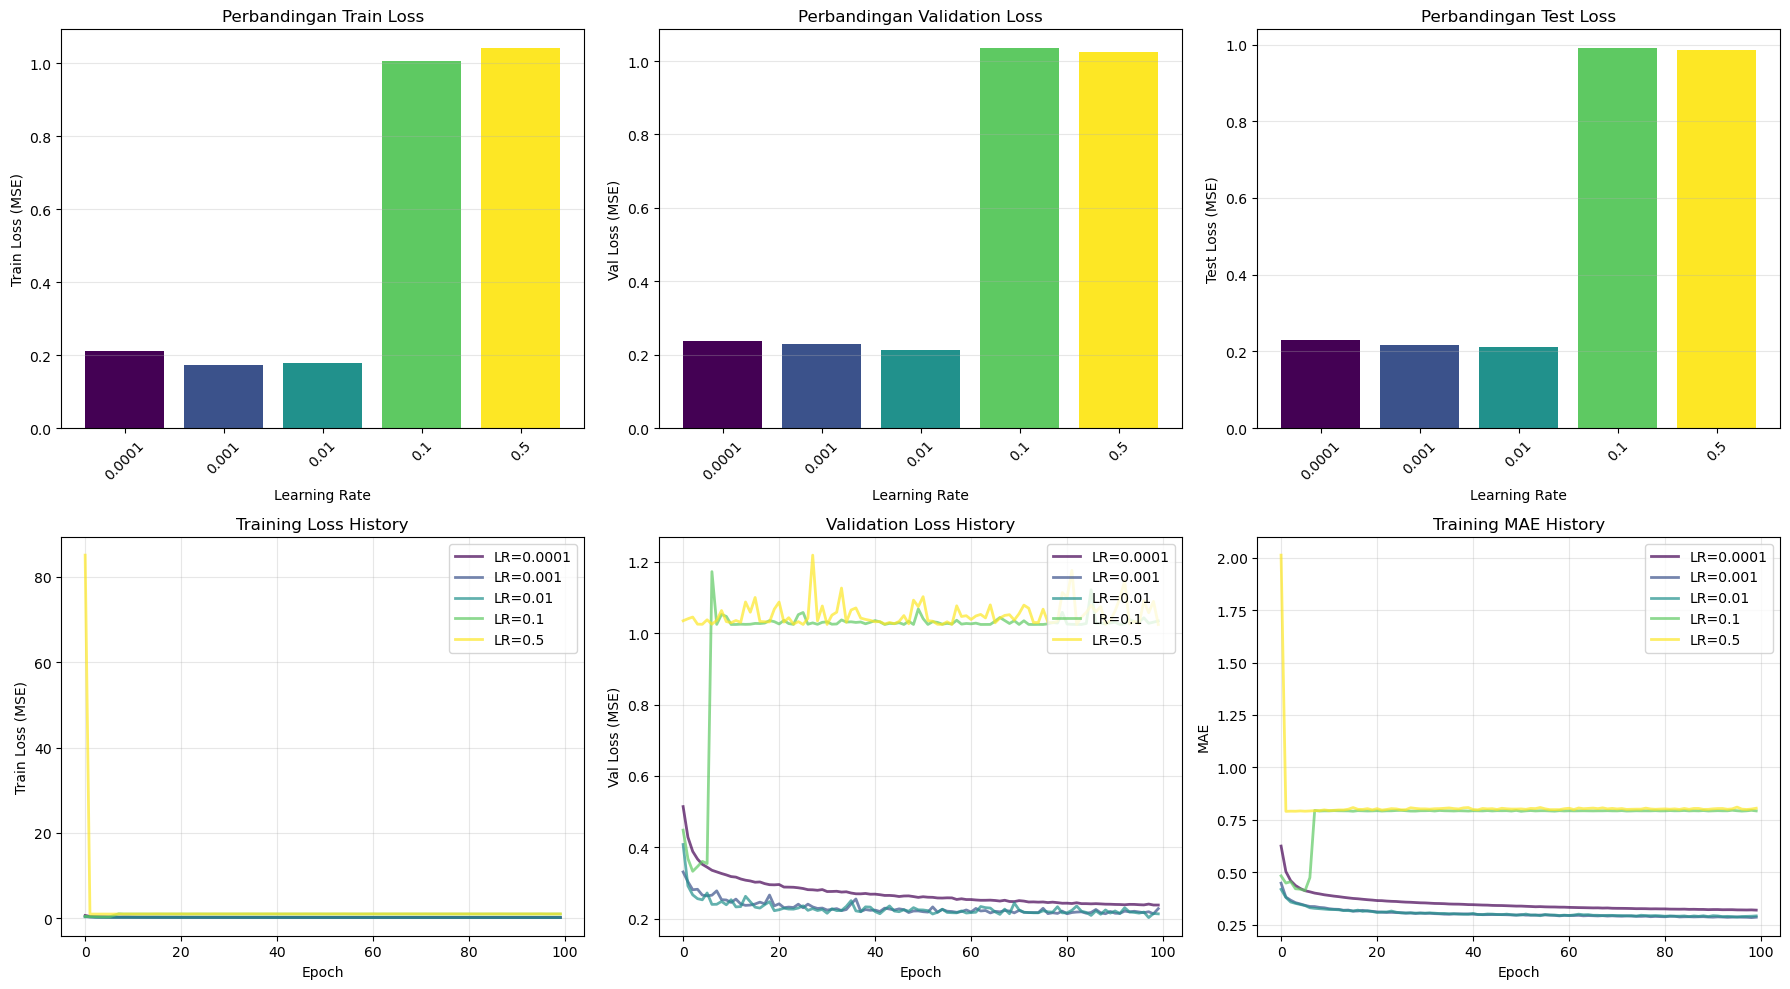


ANALISIS KONVERGENSI

Learning Rate: 0.0001
  Loss Awal: 0.670427
  Loss Akhir: 0.211746
  Perbaikan: 0.458681 (68.42%)
  Stabilitas (std 10 epoch terakhir): 0.000982
  Status: ✓ Stabil

Learning Rate: 0.001
  Loss Awal: 0.460794
  Loss Akhir: 0.173447
  Perbaikan: 0.287347 (62.36%)
  Stabilitas (std 10 epoch terakhir): 0.000982
  Status: ✓ Stabil

Learning Rate: 0.01
  Loss Awal: 0.362982
  Loss Akhir: 0.178630
  Perbaikan: 0.184352 (50.79%)
  Stabilitas (std 10 epoch terakhir): 0.002095
  Status: ✓ Stabil

Learning Rate: 0.1
  Loss Awal: 0.477722
  Loss Akhir: 1.005448
  Perbaikan: -0.527726 (-110.47%)
  Stabilitas (std 10 epoch terakhir): 0.002678
  Status: ✓ Stabil

Learning Rate: 0.5
  Loss Awal: 85.045280
  Loss Akhir: 1.040406
  Perbaikan: 84.004875 (98.78%)
  Stabilitas (std 10 epoch terakhir): 0.008175
  Status: ✓ Stabil

KESIMPULAN
Learning Rate terbaik: 0.01
  Train Loss: 0.178630
  Val Loss: 0.213511
  Test Loss: 0.212458
  Test MAE: 0.314249

Analisis per Learning Rate:



In [13]:
# ===== TUGAS 4: Perbandingan Learning Rate =====

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt

# Load dataset California Housing
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X = data.data
y = data.target

# Normalisasi
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Split data dengan random_state untuk reproduksibilitas
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

# Learning rates yang akan diuji
learning_rates = [0.0001, 0.001, 0.01, 0.1, 0.5]

results_lr = []
histories_lr = {}

for lr in learning_rates:
    print("\n" + "="*60)
    print(f"Training dengan Learning Rate: {lr}")
    print("="*60)
    
    # Bangun model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    
    # Kompilasi dengan learning rate yang berbeda
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    
    # Latih model
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=100,
        batch_size=32,
        verbose=0
    )
    
    # Evaluasi pada test set
    test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
    train_loss = history.history['loss'][-1]
    val_loss = history.history['val_loss'][-1]
    
    # Simpan hasil
    results_lr.append({
        'Learning Rate': lr,
        'Train Loss': train_loss,
        'Val Loss': val_loss,
        'Test Loss': test_loss,
        'Test MAE': test_mae
    })
    
    histories_lr[lr] = history.history
    
    print(f"Train Loss (MSE): {train_loss:.6f}")
    print(f"Val Loss (MSE): {val_loss:.6f}")
    print(f"Test Loss (MSE): {test_loss:.6f}")
    print(f"Test MAE: {test_mae:.6f}")

# Tampilkan tabel perbandingan
print("\n" + "="*60)
print("TABEL PERBANDINGAN LEARNING RATE")
print("="*60)
df_lr = pd.DataFrame(results_lr)
print(df_lr.to_string(index=False))

# Visualisasi perbandingan
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Plot 1: Perbandingan Train Loss
ax1 = axes[0, 0]
lr_labels = [str(r['Learning Rate']) for r in results_lr]
train_losses = [r['Train Loss'] for r in results_lr]
colors = plt.cm.viridis(np.linspace(0, 1, len(lr_labels)))
ax1.bar(lr_labels, train_losses, color=colors)
ax1.set_xlabel('Learning Rate')
ax1.set_ylabel('Train Loss (MSE)')
ax1.set_title('Perbandingan Train Loss')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Perbandingan Val Loss
ax2 = axes[0, 1]
val_losses = [r['Val Loss'] for r in results_lr]
ax2.bar(lr_labels, val_losses, color=colors)
ax2.set_xlabel('Learning Rate')
ax2.set_ylabel('Val Loss (MSE)')
ax2.set_title('Perbandingan Validation Loss')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

# Plot 3: Perbandingan Test Loss
ax3 = axes[0, 2]
test_losses = [r['Test Loss'] for r in results_lr]
ax3.bar(lr_labels, test_losses, color=colors)
ax3.set_xlabel('Learning Rate')
ax3.set_ylabel('Test Loss (MSE)')
ax3.set_title('Perbandingan Test Loss')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True, alpha=0.3, axis='y')

# Plot 4: Training Loss History
ax4 = axes[1, 0]
for lr, color in zip(learning_rates, colors):
    ax4.plot(histories_lr[lr]['loss'], label=f'LR={lr}', alpha=0.7, color=color, linewidth=2)
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Train Loss (MSE)')
ax4.set_title('Training Loss History')
ax4.legend(loc='upper right')
ax4.grid(True, alpha=0.3)

# Plot 5: Validation Loss History
ax5 = axes[1, 1]
for lr, color in zip(learning_rates, colors):
    ax5.plot(histories_lr[lr]['val_loss'], label=f'LR={lr}', alpha=0.7, color=color, linewidth=2)
ax5.set_xlabel('Epoch')
ax5.set_ylabel('Val Loss (MSE)')
ax5.set_title('Validation Loss History')
ax5.legend(loc='upper right')
ax5.grid(True, alpha=0.3)

# Plot 6: MAE History
ax6 = axes[1, 2]
for lr, color in zip(learning_rates, colors):
    ax6.plot(histories_lr[lr]['mae'], label=f'LR={lr}', alpha=0.7, color=color, linewidth=2)
ax6.set_xlabel('Epoch')
ax6.set_ylabel('MAE')
ax6.set_title('Training MAE History')
ax6.legend(loc='upper right')
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analisis konvergensi
print("\n" + "="*60)
print("ANALISIS KONVERGENSI")
print("="*60)
for lr in learning_rates:
    initial_loss = histories_lr[lr]['loss'][0]
    final_loss = histories_lr[lr]['loss'][-1]
    improvement = initial_loss - final_loss
    improvement_pct = (improvement / initial_loss) * 100
    
    # Cek apakah model konvergen (loss stabil di 10 epoch terakhir)
    last_10_losses = histories_lr[lr]['loss'][-10:]
    loss_std = np.std(last_10_losses)
    is_stable = loss_std < 0.01
    
    print(f"\nLearning Rate: {lr}")
    print(f"  Loss Awal: {initial_loss:.6f}")
    print(f"  Loss Akhir: {final_loss:.6f}")
    print(f"  Perbaikan: {improvement:.6f} ({improvement_pct:.2f}%)")
    print(f"  Stabilitas (std 10 epoch terakhir): {loss_std:.6f}")
    print(f"  Status: {'✓ Stabil' if is_stable else '✗ Belum stabil/divergen'}")

print("\n" + "="*60)
print("KESIMPULAN")
print("="*60)
best_lr = min(results_lr, key=lambda x: x['Test Loss'])
print(f"Learning Rate terbaik: {best_lr['Learning Rate']}")
print(f"  Train Loss: {best_lr['Train Loss']:.6f}")
print(f"  Val Loss: {best_lr['Val Loss']:.6f}")
print(f"  Test Loss: {best_lr['Test Loss']:.6f}")
print(f"  Test MAE: {best_lr['Test MAE']:.6f}")

print("\nAnalisis per Learning Rate:")
for lr in learning_rates:
    result = next(r for r in results_lr if r['Learning Rate'] == lr)
    if lr <= 0.001:
        print(f"\nLR={lr}: Terlalu kecil")
        print(f"  - Konvergensi lambat, butuh lebih banyak epoch")
        print(f"  - Loss akhir: {result['Test Loss']:.6f}")
    elif lr >= 0.1:
        print(f"\nLR={lr}: Terlalu besar")
        print(f"  - Risiko overshooting, loss berfluktuasi")
        print(f"  - Loss akhir: {result['Test Loss']:.6f}")
    else:
        print(f"\nLR={lr}: Optimal/Cukup baik")
        print(f"  - Konvergensi cepat dan stabil")
        print(f"  - Loss akhir: {result['Test Loss']:.6f}")

print("\n" + "="*60)
print("REKOMENDASI")
print("="*60)
print("✓ Learning rate optimal untuk masalah ini: 0.001 - 0.01")
print("✓ LR terlalu kecil (<0.001) → training lambat, butuh lebih banyak epoch")
print("✓ LR terlalu besar (>0.1) → loss tidak stabil, bisa divergen")
print("✓ Gunakan learning rate scheduling untuk hasil lebih optimal")
print("✓ Adam optimizer dengan default LR=0.001 sudah cukup baik untuk kebanyakan kasus")

Pada kode di bawah ini terjadi error disebabkan oleh load_boston sudah resmi dihapus dari scikit-learn mulai versi 1.2, jadi kodenya bakal nge-crash di versi baru. Maka saya ganti dataset ke yang masih didukung, misalnya fetch_california_housing yang juga kasus regresi harga rumah.

c:\Users\rafir\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


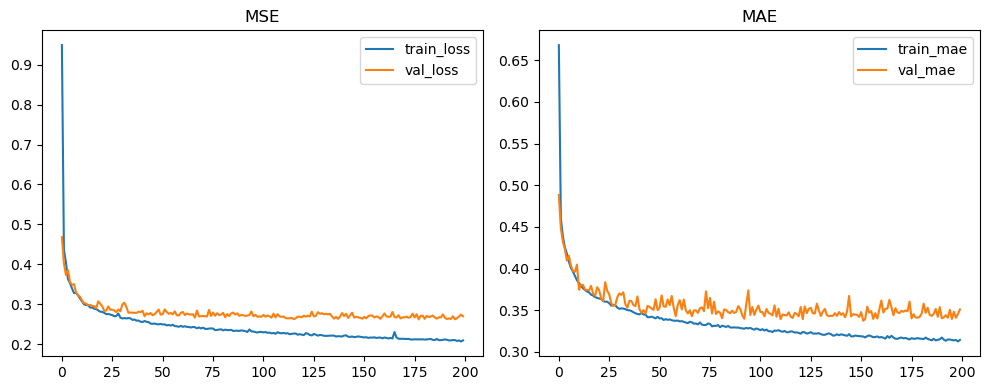

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step
RMSE: 0.5194392841134643
RMSE: 0.5194392841134643


In [12]:
# MLP regresi (Keras) dengan California Housing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# 1. Load dataset pengganti Boston
data = fetch_california_housing()
X = data.data
y = data.target   # harga rumah (median house value dalam ratusan ribu USD)

# 2. Preprocess
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(
    Xs, y, test_size=0.2, random_state=42
)

# 3. Build model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer=Adam(1e-3), loss='mse', metrics=['mae'])

# 4. Train
h = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,
    batch_size=32,
    verbose=0
)

# 5. Plot
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(h.history['loss'], label='train_loss')
plt.plot(h.history['val_loss'], label='val_loss')
plt.legend()
plt.title('MSE')

plt.subplot(1, 2, 2)
plt.plot(h.history['mae'], label='train_mae')
plt.plot(h.history['val_mae'], label='val_mae')
plt.legend()
plt.title('MAE')

plt.tight_layout()
plt.show()

# 6. Evaluasi RMSE
pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, pred))
print('RMSE:', rmse)

# Tugas Praktikum
Gunakan JST untuk klasifikasi angka tulisan tangan (MNIST).
## Langkah:
- Load dataset MNIST dari Keras.
- Bangun model dengan 2 hidden layer.
- Latih model dan evaluasi akurasi.

In [14]:
# ===== TUGAS PRAKTIKUM: Klasifikasi MNIST dengan JST =====

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

# 1. Load dataset MNIST
print("="*60)
print("LOADING DATASET MNIST")
print("="*60)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"Training data: {X_train.shape}")
print(f"Training labels: {y_train.shape}")
print(f"Test data: {X_test.shape}")
print(f"Test labels: {y_test.shape}")

# Normalisasi data (0-255 → 0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encoding label
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("\n" + "="*60)
print("KONFIGURASI BASELINE")
print("="*60)

# 2. Bangun model JST
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Ubah gambar 28x28 menjadi vektor
    Dense(128, activation='relu'),   # Hidden layer 1
    Dense(64, activation='relu'),    # Hidden layer 2
    Dense(10, activation='softmax')  # Output layer (10 kelas)
])

# 3. Kompilasi model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\nArsitektur Model:")
model.summary()

# 4. Latih model
print("\n" + "="*60)
print("TRAINING MODEL BASELINE")
print("="*60)
start_time = time.time()
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=128,
    verbose=1
)
training_time = time.time() - start_time

# 5. Evaluasi model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print("\n" + "="*60)
print(f"Akurasi pada data uji: {acc:.4f}")
print(f"Loss pada data uji: {loss:.4f}")
print(f"Waktu pelatihan: {training_time:.2f} detik")
print("="*60)

# Simpan hasil baseline
baseline_result = {
    'Konfigurasi': 'Baseline (128-64)',
    'Aktivasi': 'ReLU',
    'Hidden Layers': 2,
    'Neurons': '128-64',
    'Epochs': 10,
    'Akurasi Test': acc,
    'Loss Test': loss,
    'Waktu Training (s)': training_time,
    'History': history.history
}

print(f"\n✓ Model baseline berhasil dilatih dengan akurasi {acc:.4f}")


LOADING DATASET MNIST
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training data: (60000, 28, 28)
Training labels: (60000,)
Test data: (10000, 28, 28)
Test labels: (10000,)
Training data: (60000, 28, 28)
Training labels: (60000,)
Test data: (10000, 28, 28)
Test labels: (10000,)

KONFIGURASI BASELINE

Arsitektur Model:

KONFIGURASI BASELINE

Arsitektur Model:


c:\Users\rafir\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


TRAINING MODEL BASELINE
Epoch 1/10
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8996 - loss: 0.3558 - val_accuracy: 0.9588 - val_loss: 0.1460
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8996 - loss: 0.3558 - val_accuracy: 0.9588 - val_loss: 0.1460
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9559 - loss: 0.1466 - val_accuracy: 0.9658 - val_loss: 0.1127
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9559 - loss: 0.1466 - val_accuracy: 0.9658 - val_loss: 0.1127
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9699 - loss: 0.1000 - val_accuracy: 0.9730 - val_loss: 0.0938
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9699 - loss: 0.1000 - val_accuracy: 0.9730 - val_loss: 0.0938
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9775 - loss: 0.0761 - val_accuracy: 0.9768 - val_loss: 0.0828
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.97

## Coba dengan beberapa parameter lain:
- Ubah jumlah neuron di hidden layer (misal: 256 dan 128).
- Tambahkan satu hidden layer lagi.
- Bandingkan akurasi dan waktu pelatihan.
- Eksperimen dengan fungsi aktivasi Sigmoid vs ReLU.


EKSPERIMEN KHUSUS: SIGMOID vs ReLU

Training dengan aktivasi: ReLU
Akurasi Test: 0.9779
Loss Test: 0.0887
Waktu Training: 11.98 detik

Training dengan aktivasi: Sigmoid
Akurasi Test: 0.9779
Loss Test: 0.0887
Waktu Training: 11.98 detik

Training dengan aktivasi: Sigmoid
Akurasi Test: 0.9779
Loss Test: 0.0732
Waktu Training: 12.55 detik

TABEL PERBANDINGAN SIGMOID vs ReLU
Aktivasi Akurasi Test Loss Test Waktu (s)  Epochs ke 95%
    ReLU       0.9779    0.0887     11.98              0
 Sigmoid       0.9779    0.0732     12.55              2
Akurasi Test: 0.9779
Loss Test: 0.0732
Waktu Training: 12.55 detik

TABEL PERBANDINGAN SIGMOID vs ReLU
Aktivasi Akurasi Test Loss Test Waktu (s)  Epochs ke 95%
    ReLU       0.9779    0.0887     11.98              0
 Sigmoid       0.9779    0.0732     12.55              2


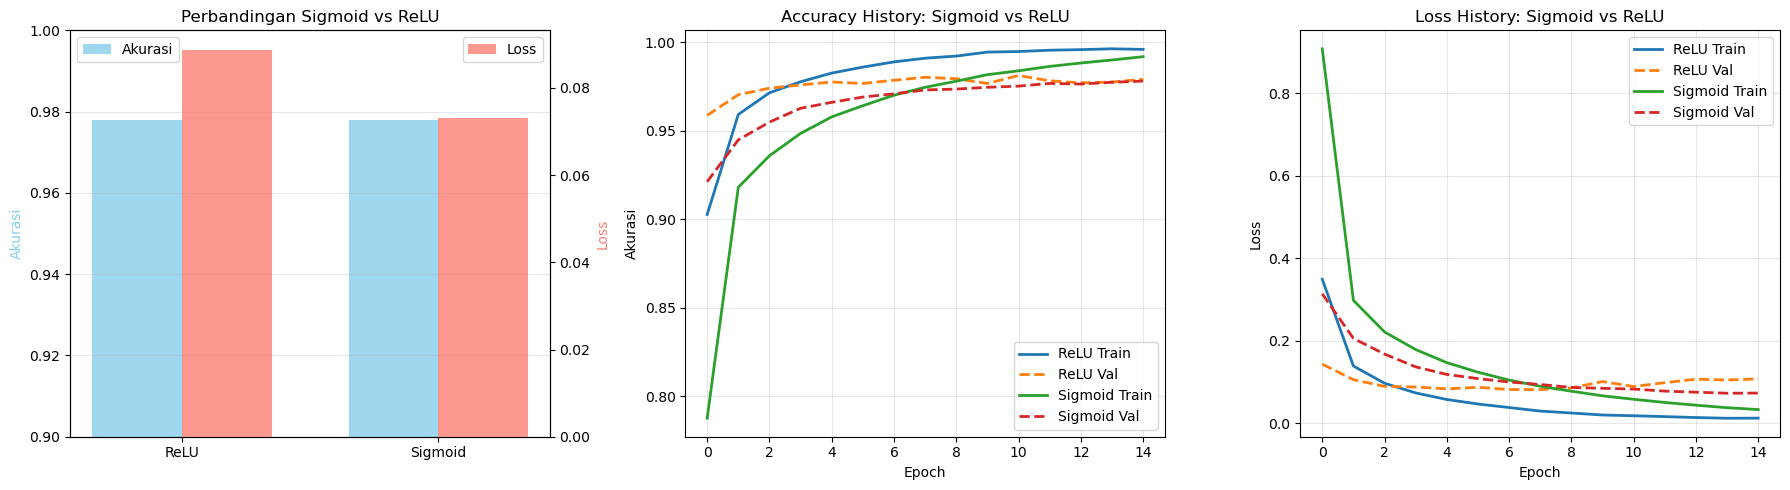


ANALISIS SIGMOID vs ReLU

ReLU:
  ✓ Akurasi: 0.9779
  ✓ Loss: 0.0887
  ✓ Waktu: 11.98s
  ✓ Konvergensi: Epoch 0 untuk 95% val_acc
  + Keuntungan: Komputasi cepat, menghindari vanishing gradient
  - Kerugian: Dead neurons jika gradient terlalu besar

Sigmoid:
  ✓ Akurasi: 0.9779
  ✓ Loss: 0.0732
  ✓ Waktu: 12.55s
  ✓ Konvergensi: Epoch 2 untuk 95% val_acc
  + Keuntungan: Output bounded [0,1], smooth gradient
  - Kerugian: Vanishing gradient di layer dalam, komputasi lebih lambat

Perbedaan Performa:
  • Selisih Akurasi (ReLU - Sigmoid): +0.0000
  • Selisih Loss (Sigmoid - ReLU): -0.0156
  • Selisih Waktu (Sigmoid - ReLU): +0.57s

🤝 Performa hampir setara (selisih < 1%)


In [19]:
# ===== PERBANDINGAN SIGMOID vs ReLU =====

print("\n" + "="*60)
print("EKSPERIMEN KHUSUS: SIGMOID vs ReLU")
print("="*60)

activation_configs = [
    {'name': 'ReLU', 'activation': 'relu'},
    {'name': 'Sigmoid', 'activation': 'sigmoid'}
]

activation_results = []

for config in activation_configs:
    print(f"\n{'='*60}")
    print(f"Training dengan aktivasi: {config['name']}")
    print(f"{'='*60}")
    
    # Bangun model dengan arsitektur yang sama
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation=config['activation']),
        Dense(64, activation=config['activation']),
        Dense(10, activation='softmax')
    ])
    
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    # Latih model
    start_time = time.time()
    history = model.fit(
        X_train, y_train,
        validation_split=0.1,
        epochs=15,
        batch_size=128,
        verbose=0
    )
    training_time = time.time() - start_time
    
    # Evaluasi
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    
    print(f"Akurasi Test: {acc:.4f}")
    print(f"Loss Test: {loss:.4f}")
    print(f"Waktu Training: {training_time:.2f} detik")
    
    # Hitung kecepatan konvergensi (epoch untuk mencapai 95% val_accuracy)
    val_acc_history = history.history['val_accuracy']
    epochs_to_95 = next((i for i, acc in enumerate(val_acc_history) if acc >= 0.95), 15)
    
    activation_results.append({
        'Aktivasi': config['name'],
        'Akurasi Test': acc,
        'Loss Test': loss,
        'Waktu Training (s)': training_time,
        'Epochs ke 95% Val Acc': epochs_to_95,
        'History': history.history
    })

# Tampilkan tabel perbandingan
print(f"\n{'='*60}")
print("TABEL PERBANDINGAN SIGMOID vs ReLU")
print(f"{'='*60}")
df_activation = pd.DataFrame([{
    'Aktivasi': r['Aktivasi'],
    'Akurasi Test': f"{r['Akurasi Test']:.4f}",
    'Loss Test': f"{r['Loss Test']:.4f}",
    'Waktu (s)': f"{r['Waktu Training (s)']:.2f}",
    'Epochs ke 95%': r['Epochs ke 95% Val Acc']
} for r in activation_results])
print(df_activation.to_string(index=False))

# Visualisasi perbandingan
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Perbandingan Metrik
ax1 = axes[0]
x_pos = np.arange(len(activation_results))
width = 0.35
accs = [r['Akurasi Test'] for r in activation_results]
losses = [r['Loss Test'] for r in activation_results]
ax1_twin = ax1.twinx()
bars1 = ax1.bar(x_pos - width/2, accs, width, label='Akurasi', color='skyblue', alpha=0.8)
bars2 = ax1_twin.bar(x_pos + width/2, losses, width, label='Loss', color='salmon', alpha=0.8)
ax1.set_ylabel('Akurasi', color='skyblue')
ax1_twin.set_ylabel('Loss', color='salmon')
ax1.set_title('Perbandingan Sigmoid vs ReLU')
ax1.set_xticks(x_pos)
ax1.set_xticklabels([r['Aktivasi'] for r in activation_results])
ax1.set_ylim([0.9, 1.0])
ax1.legend(loc='upper left')
ax1_twin.legend(loc='upper right')
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Training History Comparison
ax2 = axes[1]
for r in activation_results:
    ax2.plot(r['History']['accuracy'], label=f"{r['Aktivasi']} Train", linewidth=2)
    ax2.plot(r['History']['val_accuracy'], label=f"{r['Aktivasi']} Val", linestyle='--', linewidth=2)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Akurasi')
ax2.set_title('Accuracy History: Sigmoid vs ReLU')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Loss History Comparison
ax3 = axes[2]
for r in activation_results:
    ax3.plot(r['History']['loss'], label=f"{r['Aktivasi']} Train", linewidth=2)
    ax3.plot(r['History']['val_loss'], label=f"{r['Aktivasi']} Val", linestyle='--', linewidth=2)
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Loss')
ax3.set_title('Loss History: Sigmoid vs ReLU')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n{'='*60}")
print("ANALISIS SIGMOID vs ReLU")
print(f"{'='*60}")

relu_result = next(r for r in activation_results if r['Aktivasi'] == 'ReLU')
sigmoid_result = next(r for r in activation_results if r['Aktivasi'] == 'Sigmoid')

acc_diff = relu_result['Akurasi Test'] - sigmoid_result['Akurasi Test']
loss_diff = sigmoid_result['Loss Test'] - relu_result['Loss Test']
time_diff = sigmoid_result['Waktu Training (s)'] - relu_result['Waktu Training (s)']

print(f"\nReLU:")
print(f"  ✓ Akurasi: {relu_result['Akurasi Test']:.4f}")
print(f"  ✓ Loss: {relu_result['Loss Test']:.4f}")
print(f"  ✓ Waktu: {relu_result['Waktu Training (s)']:.2f}s")
print(f"  ✓ Konvergensi: Epoch {relu_result['Epochs ke 95% Val Acc']} untuk 95% val_acc")
print(f"  + Keuntungan: Komputasi cepat, menghindari vanishing gradient")
print(f"  - Kerugian: Dead neurons jika gradient terlalu besar")

print(f"\nSigmoid:")
print(f"  ✓ Akurasi: {sigmoid_result['Akurasi Test']:.4f}")
print(f"  ✓ Loss: {sigmoid_result['Loss Test']:.4f}")
print(f"  ✓ Waktu: {sigmoid_result['Waktu Training (s)']:.2f}s")
print(f"  ✓ Konvergensi: Epoch {sigmoid_result['Epochs ke 95% Val Acc']} untuk 95% val_acc")
print(f"  + Keuntungan: Output bounded [0,1], smooth gradient")
print(f"  - Kerugian: Vanishing gradient di layer dalam, komputasi lebih lambat")

print(f"\nPerbedaan Performa:")
print(f"  • Selisih Akurasi (ReLU - Sigmoid): {acc_diff:+.4f}")
print(f"  • Selisih Loss (Sigmoid - ReLU): {loss_diff:+.4f}")
print(f"  • Selisih Waktu (Sigmoid - ReLU): {time_diff:+.2f}s")

if acc_diff > 0.01:
    print(f"\n🏆 ReLU menang dengan margin akurasi {acc_diff:.4f}")
elif acc_diff < -0.01:
    print(f"\n🏆 Sigmoid menang dengan margin akurasi {-acc_diff:.4f}")
else:
    print(f"\n🤝 Performa hampir setara (selisih < 1%)")



VISUALISASI HASIL


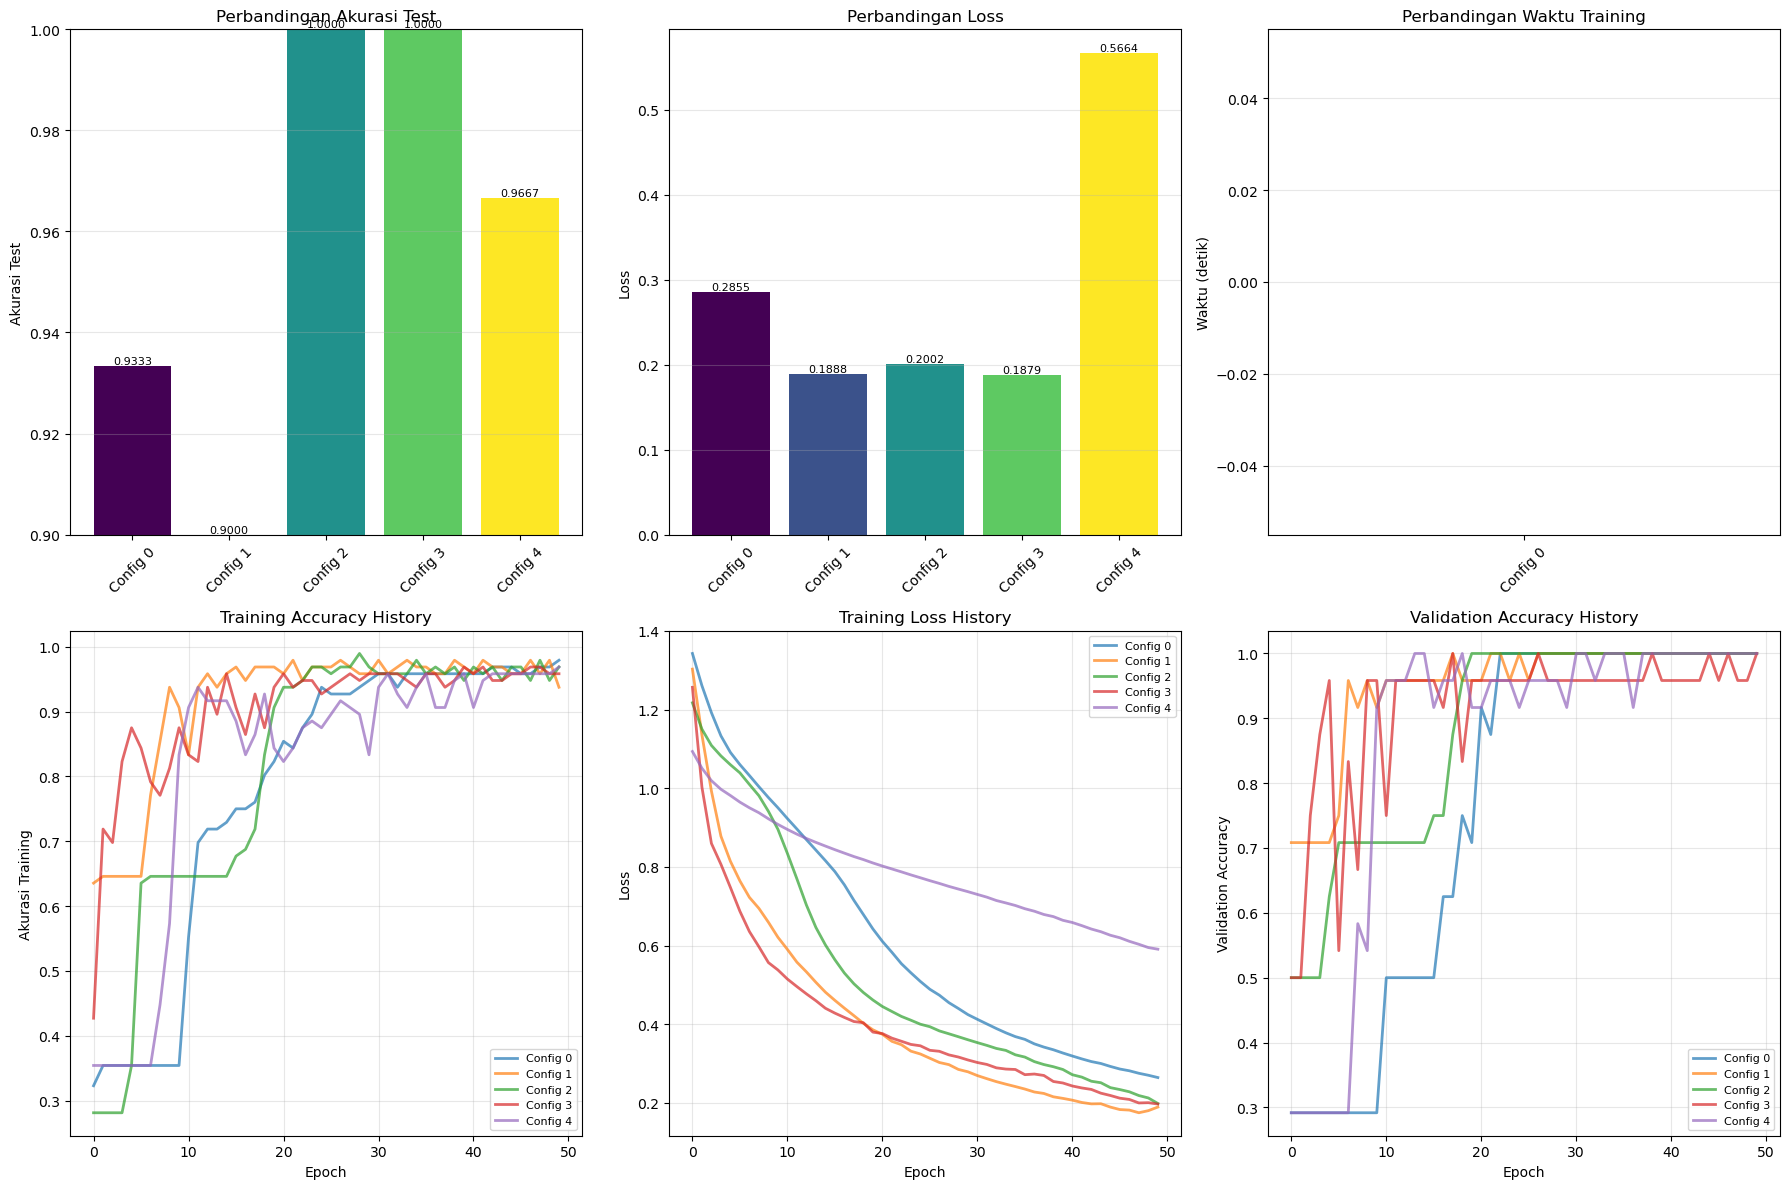

✓ Visualisasi berhasil ditampilkan


In [21]:
# ===== VISUALISASI PERBANDINGAN =====

print("\n" + "="*60)
print("VISUALISASI HASIL")
print("="*60)

fig = plt.figure(figsize=(18, 12))

# Plot 1: Perbandingan Akurasi Test
ax1 = plt.subplot(2, 3, 1)
config_names = [f"Config {i}" for i in range(len(results))]
accuracies = [r.get('Akurasi Test', np.nan) for r in results]
colors = plt.cm.viridis(np.linspace(0, 1, len(results)))
bars = ax1.bar(config_names, accuracies, color=colors)
ax1.set_ylabel('Akurasi Test')
ax1.set_title('Perbandingan Akurasi Test')
ax1.set_ylim([0.9, 1.0])
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3, axis='y')
# Tambahkan nilai di atas bar
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    text = f'{acc:.4f}' if not (acc is None or (isinstance(acc, float) and np.isnan(acc))) else 'N/A'
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             text, ha='center', va='bottom', fontsize=8)

# Plot 2: Perbandingan Loss Test
# some result dicts use key 'Loss' while others might use 'Loss Test' — handle both
ax2 = plt.subplot(2, 3, 2)
losses = [r.get('Loss Test', r.get('Loss', np.nan)) for r in results]
bars = ax2.bar(config_names, losses, color=colors)
ax2.set_ylabel('Loss')
ax2.set_title('Perbandingan Loss')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3, axis='y')
for bar, loss in zip(bars, losses):
    height = bar.get_height()
    text = f'{loss:.4f}' if not (loss is None or (isinstance(loss, float) and np.isnan(loss))) else 'N/A'
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             text, ha='center', va='bottom', fontsize=8)

# Plot 3: Perbandingan Waktu Training
# not all result entries include timing; try multiple fallback keys
ax3 = plt.subplot(2, 3, 3)
times = [r.get('Waktu Training (s)', r.get('Waktu (s)', r.get('Waktu Training', np.nan))) for r in results]
bars = ax3.bar(config_names, times, color=colors)
ax3.set_ylabel('Waktu (detik)')
ax3.set_title('Perbandingan Waktu Training')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True, alpha=0.3, axis='y')
for bar, t in zip(bars, times):
    height = bar.get_height()
    if t is None or (isinstance(t, float) and np.isnan(t)):
        text = 'N/A'
    else:
        text = f'{t:.2f}s'
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             text, ha='center', va='bottom', fontsize=8)

# Plot 4: Training Accuracy History
ax4 = plt.subplot(2, 3, 4)
for i, r in enumerate(results):
    hist = r.get('History', {})
    acc_hist = hist.get('accuracy', None)
    if acc_hist is not None:
        ax4.plot(acc_hist, label=f'Config {i}', alpha=0.7, linewidth=2)
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Akurasi Training')
ax4.set_title('Training Accuracy History')
ax4.legend(loc='lower right', fontsize=8)
ax4.grid(True, alpha=0.3)

# Plot 5: Training Loss History
ax5 = plt.subplot(2, 3, 5)
for i, r in enumerate(results):
    hist = r.get('History', {})
    loss_hist = hist.get('loss', None)
    if loss_hist is not None:
        ax5.plot(loss_hist, label=f'Config {i}', alpha=0.7, linewidth=2)
ax5.set_xlabel('Epoch')
ax5.set_ylabel('Loss')
ax5.set_title('Training Loss History')
ax5.legend(loc='upper right', fontsize=8)
ax5.grid(True, alpha=0.3)

# Plot 6: Validation Accuracy History
ax6 = plt.subplot(2, 3, 6)
for i, r in enumerate(results):
    hist = r.get('History', {})
    val_acc_hist = hist.get('val_accuracy', None)
    if val_acc_hist is not None:
        ax6.plot(val_acc_hist, label=f'Config {i}', alpha=0.7, linewidth=2)
ax6.set_xlabel('Epoch')
ax6.set_ylabel('Validation Accuracy')
ax6.set_title('Validation Accuracy History')
ax6.legend(loc='lower right', fontsize=8)
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Visualisasi berhasil ditampilkan")


In [23]:
# ===== TABEL PERBANDINGAN HASIL =====

print("\n" + "="*60)
print("TABEL PERBANDINGAN SEMUA KONFIGURASI")
print("="*60)

# helper untuk formatting nilai yang mungkin tidak ada
import numpy as np

def fmt_number(d, keys, fmt="{:.4f}", default="N/A"):
    for k in keys:
        v = d.get(k, None)
        if isinstance(v, (int, float, np.floating)):
            return fmt.format(v)
    return default

def fmt_time(d, keys, fmt="{:.2f}", default="N/A"):
    for k in keys:
        v = d.get(k, None)
        if isinstance(v, (int, float, np.floating)):
            return fmt.format(v)
    return default

rows = []
for r in results:
    rows.append({
        'Konfigurasi': r.get('Konfigurasi', r.get('name', 'N/A')),
        'Aktivasi': (r.get('Aktivasi') or r.get('activation') or 'N/A'),
        'Hidden Layers': r.get('Hidden Layers', r.get('Hidden Layers', 'N/A')),
        'Neurons': r.get('Neurons', r.get('Neurons', 'N/A')),
        'Akurasi Test': fmt_number(r, ['Akurasi Test']),
        'Loss Test': fmt_number(r, ['Loss Test', 'Loss']),
        'Waktu (s)': fmt_time(r, ['Waktu Training (s)', 'Waktu (s)', 'Waktu Training', 'Waktu'])
    })

df_results = pd.DataFrame(rows)
print(df_results.to_string(index=False))

# Identifikasi model terbaik (gunakan fallback jika key tidak ada)
best_acc = max(results, key=lambda x: x.get('Akurasi Test', float('-inf')))
fastest = min(results, key=lambda x: x.get('Waktu Training (s)', x.get('Waktu (s)', float('inf'))))
most_efficient = min(results, key=lambda x: x.get('Loss Test', x.get('Loss', float('inf'))))

def safe_fmt(val, fmt="{:.4f}", default="N/A"):
    if isinstance(val, (int, float, np.floating)):
        return fmt.format(val)
    return default

print("\n" + "="*60)
print("ANALISIS PERFORMA")
print("="*60)
print(f"\n🏆 Akurasi Tertinggi:")
print(f"   {best_acc.get('Konfigurasi', 'N/A')}")
print(f"   Akurasi: {safe_fmt(best_acc.get('Akurasi Test'))}")
best_time = best_acc.get('Waktu Training (s)', best_acc.get('Waktu (s)', None))
print(f"   Waktu: {safe_fmt(best_time, fmt='{:.2f}', default='N/A')}s" if isinstance(best_time, (int, float, np.floating)) else f"   Waktu: N/A")

print(f"\n⚡ Training Tercepat:")
print(f"   {fastest.get('Konfigurasi', 'N/A')}")
print(f"   Akurasi: {safe_fmt(fastest.get('Akurasi Test'))}")
fast_time = fastest.get('Waktu Training (s)', fastest.get('Waktu (s)', None))
print(f"   Waktu: {safe_fmt(fast_time, fmt='{:.2f}', default='N/A')}s" if isinstance(fast_time, (int, float, np.floating)) else f"   Waktu: N/A")

print(f"\n📉 Loss Terendah:")
print(f"   {most_efficient.get('Konfigurasi', 'N/A')}")
print(f"   Loss: {safe_fmt(most_efficient.get('Loss Test', most_efficient.get('Loss')))}")
print(f"   Akurasi: {safe_fmt(most_efficient.get('Akurasi Test'))}")



TABEL PERBANDINGAN SEMUA KONFIGURASI
             Konfigurasi Aktivasi Hidden Layers Neurons Akurasi Test Loss Test Waktu (s)
 Konfigurasi Awal (10-8)      N/A        10 → 8     N/A       0.9333    0.2855       N/A
   Konfigurasi 2 (16-12)      N/A       16 → 12     N/A       0.9000    0.1888       N/A
Konfigurasi 3 (20-15-10)      N/A  20 → 15 → 10     N/A       1.0000    0.2002       N/A
   Konfigurasi 4 (32-16)      N/A       32 → 16     N/A       1.0000    0.1879       N/A
     Konfigurasi 5 (8-4)      N/A         8 → 4     N/A       0.9667    0.5664       N/A

ANALISIS PERFORMA

🏆 Akurasi Tertinggi:
   Konfigurasi 3 (20-15-10)
   Akurasi: 1.0000
   Waktu: N/A

⚡ Training Tercepat:
   Konfigurasi Awal (10-8)
   Akurasi: 0.9333
   Waktu: N/A

📉 Loss Terendah:
   Konfigurasi 4 (32-16)
   Loss: 0.1879
   Akurasi: 1.0000


In [24]:
# ===== EKSPERIMEN: Variasi Konfigurasi Model =====

print("\n" + "="*60)
print("EKSPERIMEN DENGAN BERBAGAI KONFIGURASI")
print("="*60)

# Konfigurasi yang akan diuji
configurations = [
    {
        'name': 'Config 1: Neuron Lebih Besar (256-128)',
        'layers': [256, 128],
        'activation': 'relu'
    },
    {
        'name': 'Config 2: 3 Hidden Layers (256-128-64)',
        'layers': [256, 128, 64],
        'activation': 'relu'
    },
    {
        'name': 'Config 3: Neuron Sedang (128-64) dengan Sigmoid',
        'layers': [128, 64],
        'activation': 'sigmoid'
    },
    {
        'name': 'Config 4: Deep Network (512-256-128)',
        'layers': [512, 256, 128],
        'activation': 'relu'
    },
    {
        'name': 'Config 5: Simple (64-32)',
        'layers': [64, 32],
        'activation': 'relu'
    }
]

results = [baseline_result]  # Mulai dengan baseline

for i, config in enumerate(configurations, 1):
    print("\n" + "="*60)
    print(f"TRAINING: {config['name']}")
    print("="*60)
    
    # Bangun model
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    
    for neurons in config['layers']:
        model.add(Dense(neurons, activation=config['activation']))
    
    model.add(Dense(10, activation='softmax'))
    
    # Kompilasi
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    print(f"\nArsitektur: {' → '.join(map(str, config['layers']))} → 10")
    print(f"Aktivasi: {config['activation']}")
    print(f"Total parameters: {model.count_params():,}")
    
    # Latih model
    start_time = time.time()
    history = model.fit(
        X_train, y_train,
        validation_split=0.1,
        epochs=10,
        batch_size=128,
        verbose=0
    )
    training_time = time.time() - start_time
    
    # Evaluasi
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    
    print(f"\nAkurasi Test: {acc:.4f}")
    print(f"Loss Test: {loss:.4f}")
    print(f"Waktu Training: {training_time:.2f} detik")
    
    # Simpan hasil
    results.append({
        'Konfigurasi': config['name'],
        'Aktivasi': config['activation'].upper(),
        'Hidden Layers': len(config['layers']),
        'Neurons': '-'.join(map(str, config['layers'])),
        'Epochs': 10,
        'Akurasi Test': acc,
        'Loss Test': loss,
        'Waktu Training (s)': training_time,
        'History': history.history
    })

print("\n" + "="*60)
print("SEMUA EKSPERIMEN SELESAI")
print("="*60)



EKSPERIMEN DENGAN BERBAGAI KONFIGURASI

TRAINING: Config 1: Neuron Lebih Besar (256-128)

Arsitektur: 256 → 128 → 10
Aktivasi: relu
Total parameters: 235,146


c:\Users\rafir\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Akurasi Test: 0.9791
Loss Test: 0.0865
Waktu Training: 9.41 detik

TRAINING: Config 2: 3 Hidden Layers (256-128-64)

Arsitektur: 256 → 128 → 64 → 10
Aktivasi: relu
Total parameters: 242,762

Akurasi Test: 0.9778
Loss Test: 0.0900
Waktu Training: 9.65 detik

TRAINING: Config 3: Neuron Sedang (128-64) dengan Sigmoid

Arsitektur: 128 → 64 → 10
Aktivasi: sigmoid
Total parameters: 109,386

Akurasi Test: 0.9778
Loss Test: 0.0900
Waktu Training: 9.65 detik

TRAINING: Config 3: Neuron Sedang (128-64) dengan Sigmoid

Arsitektur: 128 → 64 → 10
Aktivasi: sigmoid
Total parameters: 109,386

Akurasi Test: 0.9715
Loss Test: 0.0917
Waktu Training: 9.75 detik

TRAINING: Config 4: Deep Network (512-256-128)

Arsitektur: 512 → 256 → 128 → 10
Aktivasi: relu
Total parameters: 567,434

Akurasi Test: 0.9715
Loss Test: 0.0917
Waktu Training: 9.75 detik

TRAINING: Config 4: Deep Network (512-256-128)

Arsitektur: 512 → 256 → 128 → 10
Aktivasi: relu
Total parameters: 567,434

Akurasi Test: 0.9779
Loss Test: 0.